In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Data/steam_reviews.csv")
df.head(10)

,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,0,292030,The Witcher 3: Wild Hunt,85185598,schinese,不玩此生遗憾，RPG游戏里的天花板，太吸引人了,1611381629,1611381629,True,0,...,True,False,False,76561199095369542,6,2,1909.0,1448.0,1909.0,1.611343e+09
1,1,292030,The Witcher 3: Wild Hunt,85185250,schinese,拔DIAO无情打桩机--杰洛特!!!,1611381030,1611381030,True,0,...,True,False,False,76561198949504115,30,10,2764.0,2743.0,2674.0,1.611386e+09
2,2,292030,The Witcher 3: Wild Hunt,85185111,schinese,巫师3NB,1611380800,1611380800,True,0,...,True,False,False,76561199090098988,5,1,1061.0,1061.0,1060.0,1.611384e+09
3,3,292030,The Witcher 3: Wild Hunt,85184605,english,"One of the best RPG's of all time, worthy of a...",1611379970,1611379970,True,0,...,True,False,False,76561199054755373,5,3,5587.0,3200.0,5524.0,1.611384e+09
4,4,292030,The Witcher 3: Wild Hunt,85184287,schinese,大作,1611379427,1611379427,True,0,...,True,False,False,76561199028326951,7,4,217.0,42.0,217.0,1.610788e+09
5,5,292030,The Witcher 3: Wild Hunt,85184171,english,"good story, good graphics. lots to do.",1611379264,1611379264,True,0,...,True,False,False,76561198170193529,11,1,823.0,823.0,823.0,1.611379e+09
6,6,292030,The Witcher 3: Wild Hunt,85184064,english,"dis gud,",1611379091,1611379091,True,0,...,True,False,False,76561198119302812,27,2,4192.0,3398.0,4192.0,1.611352e+09
7,7,292030,The Witcher 3: Wild Hunt,85183602,turkish,.\n,1611378312,1611378312,True,0,...,True,False,False,76561199084188849,9,1,2701.0,0.0,2701.0,1.609671e+09
8,8,292030,The Witcher 3: Wild Hunt,85183227,schinese,年度最佳的作品，没啥好夸的，神作,1611377703,1611377703,True,0,...,True,False,False,76561198130808993,581,17,6921.0,222.0,6921.0,1.611317e+09
9,9,292030,The Witcher 3: Wild Hunt,85182785,spanish,great game,1611377005,1611377005,True,0,...,True,False,False,76561198301724112,38,5,2399.0,333.0,2364.0,1.611379e+09


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21747371 entries, 0 to 21747370
Data columns (total 23 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   Unnamed: 0                      int64  
 1   app_id                          int64  
 2   app_name                        object 
 3   review_id                       int64  
 4   language                        object 
 5   review                          object 
 6   timestamp_created               int64  
 7   timestamp_updated               int64  
 8   recommended                     bool   
 9   votes_helpful                   int64  
 10  votes_funny                     int64  
 11  weighted_vote_score             float64
 12  comment_count                   int64  
 13  steam_purchase                  bool   
 14  received_for_free               bool   
 15  written_during_early_access     bool   
 16  author.steamid                  int64  
 17  author.num_games_owned   

### Simpan dataframe asli di variabel baru

In [4]:
df_saved = df

## Drop kolom-kolom yang tidak digunakan
Kolom-kolom id tidak berpengaruh pada model sehingga harus didrop

In [5]:
column_drop = [col for col in df.columns if 'id' in col]
print(column_drop)

df = df.drop(columns=column_drop)
df.info()

['app_id', 'review_id', 'author.steamid']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21747371 entries, 0 to 21747370
Data columns (total 20 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   Unnamed: 0                      int64  
 1   app_name                        object 
 2   language                        object 
 3   review                          object 
 4   timestamp_created               int64  
 5   timestamp_updated               int64  
 6   recommended                     bool   
 7   votes_helpful                   int64  
 8   votes_funny                     int64  
 9   weighted_vote_score             float64
 10  comment_count                   int64  
 11  steam_purchase                  bool   
 12  received_for_free               bool   
 13  written_during_early_access     bool   
 14  author.num_games_owned          int64  
 15  author.num_reviews              int64  
 16  author.playtime_forever     

### Cek bahasa apa saja yang ada dalam dataframe

In [6]:
df['language'].unique()
df['language'].value_counts()

language
english       9635437
schinese      3764967
russian       2348900
brazilian      837524
spanish        813320
german         752596
turkish        635868
koreana        613632
french         541751
polish         495529
tchinese       218203
czech          133980
italian        133307
thai           127503
japanese        81754
portuguese      81386
swedish         80226
dutch           77555
hungarian       71001
latam           70103
danish          55915
finnish         54712
norwegian       36797
romanian        32730
ukrainian       21169
greek           14472
bulgarian       10454
vietnamese       6580
Name: count, dtype: int64

### Gunakan bahasa inggris untuk prediksi ini

In [7]:
df = df[df['language'] == 'english']
df['language'].unique()

# kolom language dapat didrop karena hanya ada 1 kategori
df = df.drop(columns=['language'])

### Lihat distribusi data output

recommended
True     8584444
False    1050993
Name: count, dtype: int64


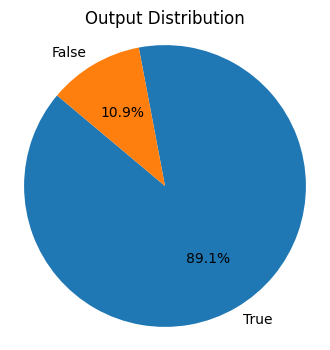

In [8]:
output_count = df['recommended'].value_counts()
print(output_count)

plt.figure(figsize=(4, 4))
plt.pie(output_count, labels=output_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Output Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Dapat dilihat bahwa terjadi data imbalance, di mana kasus True ada sebanyak 89.1% dari keseluruhan data dan kasus False hanya sebanyak 10.9%. Hal ini dapat menyebabkan overfitting pada model.

### Lihat korelasi antarkolom

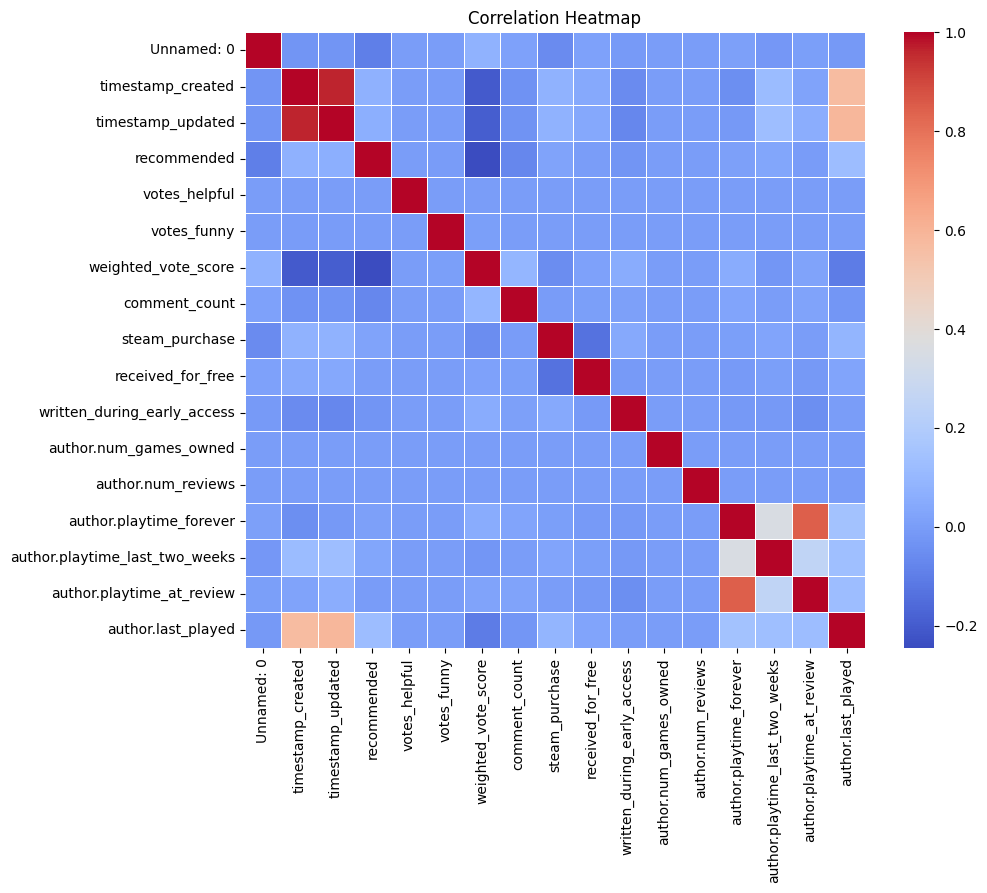

In [12]:
# Compute the correlation matrix
corr_matrix = df.drop(columns=['app_name', 'review']).corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()